# Women Shopping DBSCAN

**Problem Statement**

Can we find more deeply and sensitive insight about potential customer, when we're clustering customer segmentation with "DBSCAN" algorithm?

**About "DBSCAN"**

DBSCAN is density-based clustering algorithm that robust to outliers (noises).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Explore the data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Find insight between Male and Female

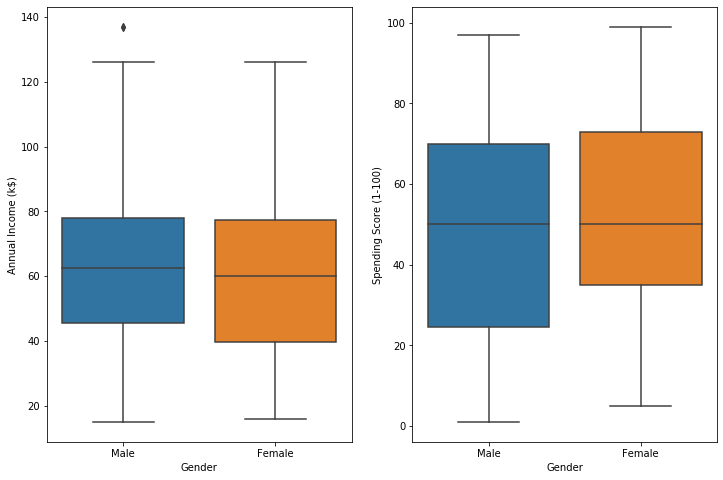

In [9]:
fig, axes = plt.subplots(1, 2, figsize =(12,8))

sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, orient='v', ax=axes[0])
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, orient='v', ax=axes[1])

**Women look spend more than men. Let's focus on "Female"!**

# Grouping Data with "Female"

In [10]:
df_group_one = df[['Gender','Annual Income (k$)','Spending Score (1-100)']]
df_group_one.groupby(['Gender'],as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [11]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [12]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


# Compute DBSCAN

I am setting with a little so densy. Thus more noises will appear, but we can find a lot more insight with very sensitive result.

eps=0.5, min_samples=4

In [14]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [15]:
Clus_dataSet = df_female[['Age','Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [16]:
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)

In [17]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [19]:
df_female.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_Db
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
5,6,Female,22,17,76,0
6,7,Female,35,18,6,-1


In [21]:
print(set(labels))

{0, 1, 2, 3, -1}


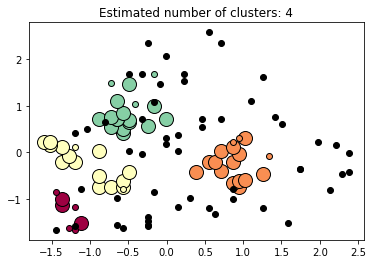

In [22]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

In [23]:
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

number of noise(s):  54


# Data Visualization

In [24]:
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Age: '+ str(round(np.mean(clust_set.Age)))+\
               ', Avg Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 22, Avg Income: 26, Avg Spending: 78, Count: 7
Cluster 1, Avg Age: 49, Avg Income: 54, Avg Spending: 50, Count: 17
Cluster 2, Avg Age: 25, Avg Income: 52, Avg Spending: 50, Count: 16
Cluster 3, Avg Age: 32, Avg Income: 82, Avg Spending: 82, Count: 18


# Conclusion

With tightly setting, we found that "Cluster 3 (average age: 32)" which highest average income and spending is the most potential customer group. The second candidate is "Cluster 0 (average age: 22)" which lowest average income but spending a lot. For some countries, "Cluster 3" will represent people who are being settled down (have a family) which spending most for their children. And "Cluster 0" will represent people who are starting a new work-life after graduated that spending most for their new society life.

This analysis is only focus on women. Maybe men have a little difference insight.
Please try to find it, and share with me!

# The End!